In [20]:
import tensorflow as tf
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax
from transformers import pipeline
import pandas as pd
import re

In [12]:
df = pd.read_csv("yelp_reviews.csv")
df.drop(['Unnamed: 0','res_url'], axis=1, inplace=True)

In [18]:
def lab_function(row):
    if row['points'] == '5 star rating' :
        return 1
    elif row['points'] == '4 star rating' :
        return 1
    elif row['points'] == '3 star rating' :
        return 0
    elif row['points'] == '2 star rating' :
        return -1
    elif row['points'] == '1 star rating' :
        return -1
    

df['label'] = df.apply(lambda x: lab_function(x),axis=1)
df.drop('points', axis=1,inplace=True)

In [21]:
df['cleaned_text'] = df.apply(lambda x: re.sub('[^a-zA-Z1-9 ]','',str(x.res_reviews)).lower(),axis=1)
df.drop('res_reviews',axis=1,inplace=True)

In [23]:
df.head()

,label,cleaned_text
0,1,i visited this spot because another usc profes...
1,1,i really wish yelp had a decimal system not al...
2,1,decent spot for some quick italian grub if you...
3,1,the past 5 times ive ordered the daily special...
4,0,kinda average wasnt anything to special felt l...


In [37]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
#model.save_pretrained(MODEL)

classifier = pipeline("sentiment-analysis", model=MODEL,tokenizer=MODEL, max_length=512, truncation=True)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassifi

In [43]:
res = classifier(df['cleaned_text'].to_list())

In [44]:
cp_res = res

In [54]:
cp_res

[{'label': 'positive', 'score': 0.9729459881782532},
 {'label': 'positive', 'score': 0.4719589650630951},
 {'label': 'positive', 'score': 0.9092052578926086},
 {'label': 'positive', 'score': 0.9349462389945984},
 {'label': 'negative', 'score': 0.7043865323066711},
 {'label': 'positive', 'score': 0.9879683256149292},
 {'label': 'positive', 'score': 0.5718430280685425},
 {'label': 'negative', 'score': 0.38137567043304443},
 {'label': 'positive', 'score': 0.9438474178314209},
 {'label': 'positive', 'score': 0.8422220349311829},
 {'label': 'positive', 'score': 0.9229409098625183},
 {'label': 'positive', 'score': 0.9773688316345215},
 {'label': 'positive', 'score': 0.9162188172340393},
 {'label': 'negative', 'score': 0.4987042248249054},
 {'label': 'positive', 'score': 0.5357368588447571},
 {'label': 'negative', 'score': 0.8982570767402649},
 {'label': 'positive', 'score': 0.9742113947868347},
 {'label': 'positive', 'score': 0.9745306968688965},
 {'label': 'positive', 'score': 0.89189577102

In [49]:
res = cp_res

In [50]:
for x in res:
    if x['score'] < 0.3:
        x['label'] = "neutral"

In [51]:
lst = []
for x in res:
    if x['label'] == 'positive':
        lst.append(1)
    elif x['label'] == 'negative':
        lst.append(-1)
    elif x['label'] == 'neutral':
        lst.append(0)

<AxesSubplot:>

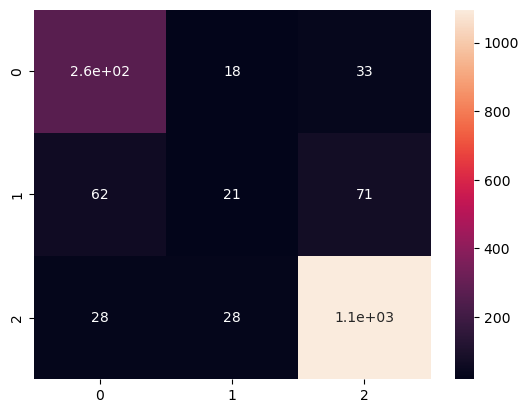

In [52]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(df['label'], lst)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(df['label'], lst))

              precision    recall  f1-score   support

          -1       0.75      0.84      0.79       315
           0       0.31      0.14      0.19       154
           1       0.91      0.95      0.93      1152

    accuracy                           0.85      1621
   macro avg       0.66      0.64      0.64      1621
weighted avg       0.82      0.85      0.83      1621

